# Congestion

Mission analyste réseau :

-> Etudes des limitations et définitions de gabarits pour les points de raccordements.

-> Etude de la congestion du réseau et identification des poches.



## Définitions

## Importations de librairies

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Datas

### Chronique de puissance de dépassement – Zone de Perquie 2025
- Chronique de puissance de dépassement – Zone de Perquie 2025
- Chronique de marges à la réinjection - Zone de Perquie 2030 

In [263]:
path_CDC_Perquie_2025 = '/Users/matthiasmolenat/repos/congestion/data/2021-10-25 Chroniques de contraintes - Zone de Perquie 2025.xlsx'
path_CDC_Perquie_2030 = '/Users/matthiasmolenat/repos/congestion/data/2021-10-25 Chroniques de contraintes - Zone de Perquie 2030.xlsx'

In [264]:
df_CDPD_P_25 = pd.read_excel(path_CDC_Perquie_2025)
df_CDPD_P_30 = pd.read_excel(path_CDC_Perquie_2030)
df_CDPD_P_25.tail()


,Mois,Jour,heure,Dépassement année météo 1,Dépassement année météo 2,Dépassement année météo 3,Dépassement année météo 4,Dépassement année météo 5,Dépassement année météo 6,Dépassement année météo 7,Dépassement année météo 8,Dépassement année météo 9,Dépassement année météo 10,Dépassement année météo 11
8731,6,29,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8732,6,29,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8733,6,29,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8734,6,29,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8735,6,29,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
print(df_CDPD_P_25.columns)

Index(['Mois', 'Jour', 'heure', 'Dépassement année météo 1',
       'Dépassement année météo 2', 'Dépassement année météo 3',
       'Dépassement année météo 4', 'Dépassement année météo 5',
       'Dépassement année météo 6', 'Dépassement année météo 7',
       'Dépassement année météo 8', 'Dépassement année météo 9',
       'Dépassement année météo 10', 'Dépassement année météo 11'],
      dtype='object')


### Les chroniques de marges à la réinjection 

- Chronique de marges à la réinjection - Zone de Perquie 2025 
- Chronique de marges à la réinjection - Zone de Perquie 2030

In [266]:
path_MI_Perquie_2025 = '/Users/matthiasmolenat/repos/congestion/data/marges injection 2025 - PV.xlsx'
path_MI_Perquie_2030 = '/Users/matthiasmolenat/repos/congestion/data/marges injection 2025 - PV.xlsx'
Sheet1 = 'Perquie-marge injection'
Sheet2 = 'Barbotan-marge injection'

In [267]:
xls_MI_P_25 = pd.ExcelFile(path_MI_Perquie_2025)
df_MI_P_P_25 = pd.read_excel(xls_MI_P_25, Sheet1)
df_MI_P_B_25 = pd.read_excel(xls_MI_P_25, Sheet2)

xls_MI_P_30 = pd.ExcelFile(path_MI_Perquie_2030)
df_MI_P_P_30 = pd.read_excel(xls_MI_P_30, Sheet1)
df_MI_P_B_30 = pd.read_excel(xls_MI_P_30, Sheet2)

## Exploitation


### 1. On cherche dans le dataframe de Chronique de puissance de dépassement 2025 (resp. 2030)
- le scénario parmi les 11 qui est le plus contraint en moyenne horaire, 
- le scénario parmi les 11 qui est le plus intensémment contraint, lorsque constraint,
- le scénario parmi les 11 qui est le plus souvent contraint.

In [286]:
list_name_scnenario = ['Dépassement année météo 1',
       'Dépassement année météo 2', 'Dépassement année météo 3',
       'Dépassement année météo 4', 'Dépassement année météo 5',
       'Dépassement année météo 6', 'Dépassement année météo 7',
       'Dépassement année météo 8', 'Dépassement année météo 9',
       'Dépassement année météo 10', 'Dépassement année météo 11']


df1 = df_CDPD_P_25[list_name_scnenario]
df2 = df_CDPD_P_25

#df1 = df_CDPD_P_30[list_name_scnenario]
#df2 = df_CDPD_P_30


In [287]:
print('Identifier le scénario parmi les 11 qui est le plus contraint en moyenne horaire :')
df1_mean=df1.mean()
print(df1_mean.idxmax())

Identifier le scénario parmi les 11 qui est le plus contraint en moyenne horaire :
Dépassement année météo 5


In [288]:
print('Identifier le scénario parmi les 11 qui est le plus intensémment contraint, lorsque constraint :')
df1_mean2 = df1.replace(0,np.nan).mean(skipna=True)
print(df1_mean2.idxmax())

Identifier le scénario parmi les 11 qui est le plus intensémment contraint, lorsque constraint :
Dépassement année météo 5


In [289]:
print('Identifier le scénario parmi les 11 qui est le plus souvent contraint :')
df_lim=df1.replace(0,np.nan).count(axis='index')
print(df_lim.idxmax())


Identifier le scénario parmi les 11 qui est le plus souvent contraint :
Dépassement année météo 11


In [290]:
print(df_lim)

Dépassement année météo 1     164
Dépassement année météo 2     155
Dépassement année météo 3     148
Dépassement année météo 4     130
Dépassement année météo 5     176
Dépassement année météo 6     162
Dépassement année météo 7     164
Dépassement année météo 8     113
Dépassement année météo 9     146
Dépassement année météo 10    114
Dépassement année météo 11    179
dtype: int64


Identifier les heures les plus contraintes, scénario par scénario :


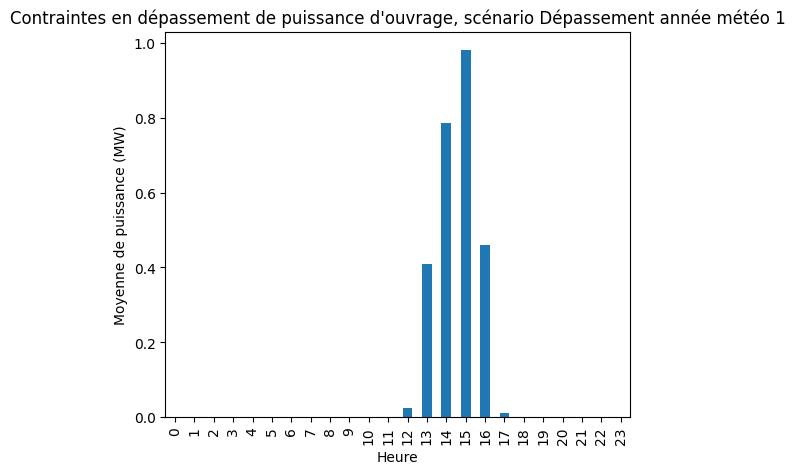

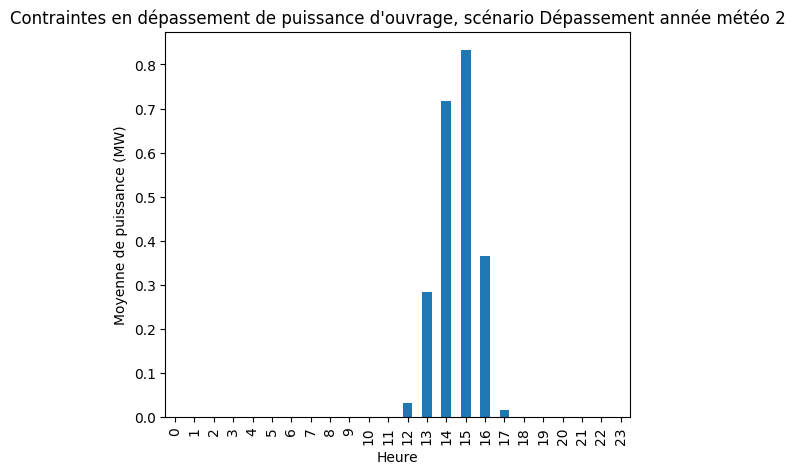

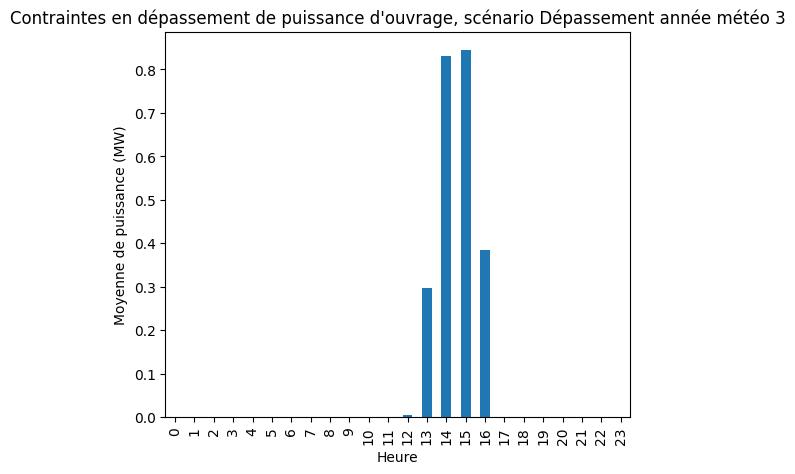

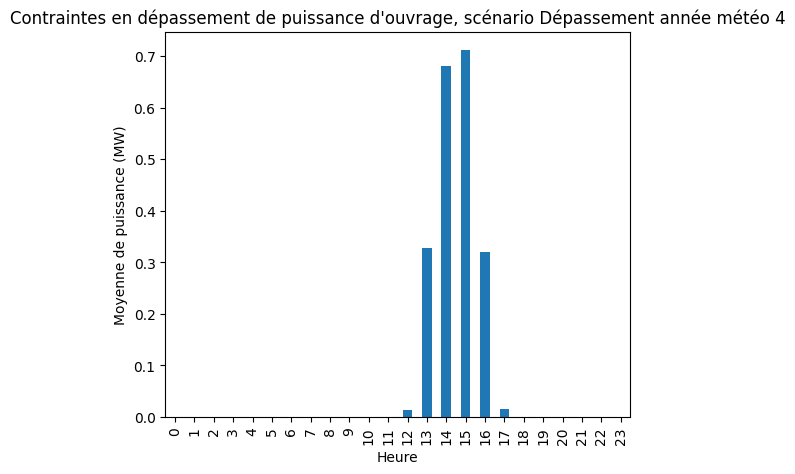

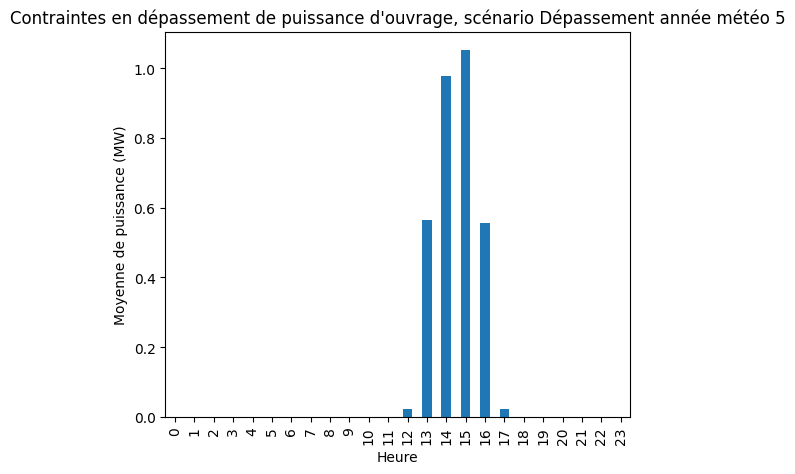

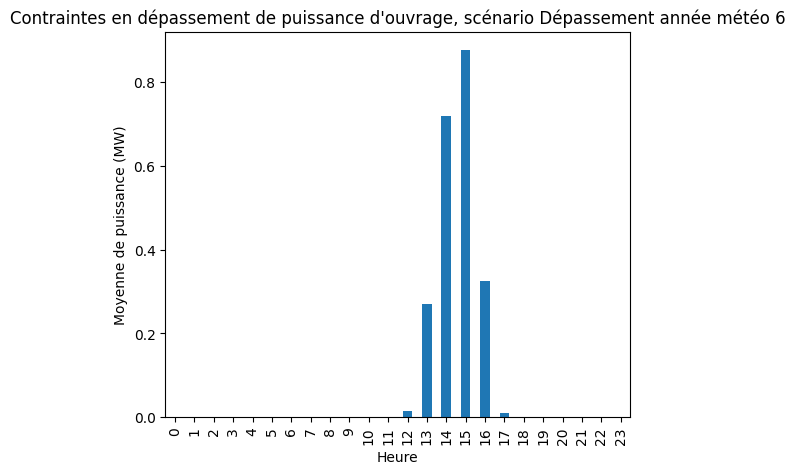

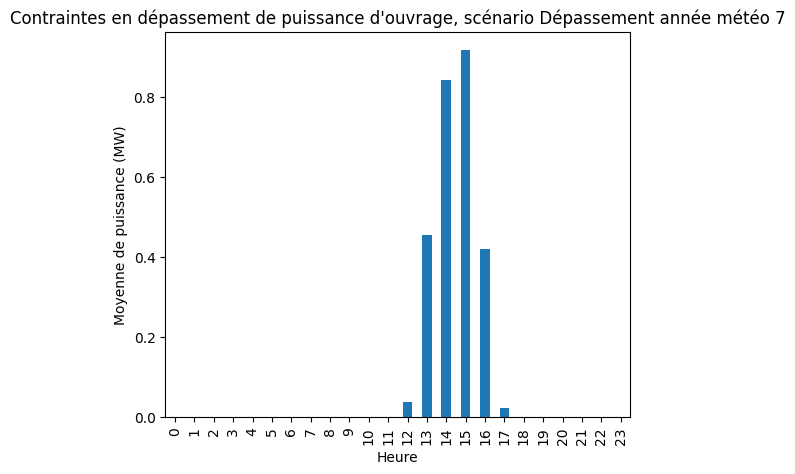

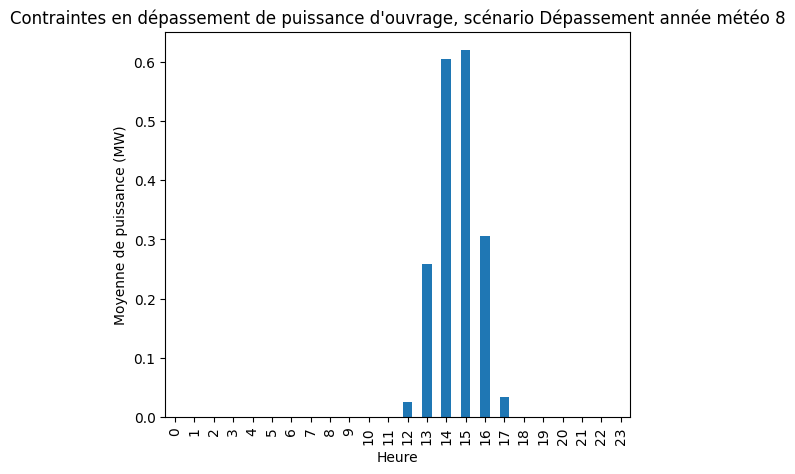

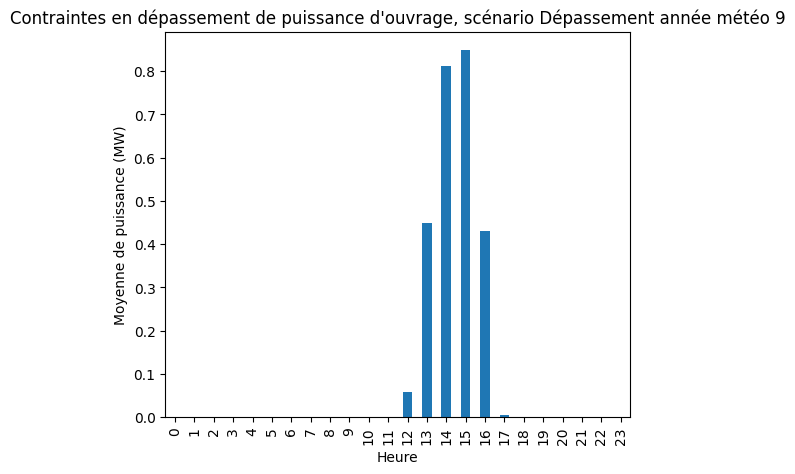

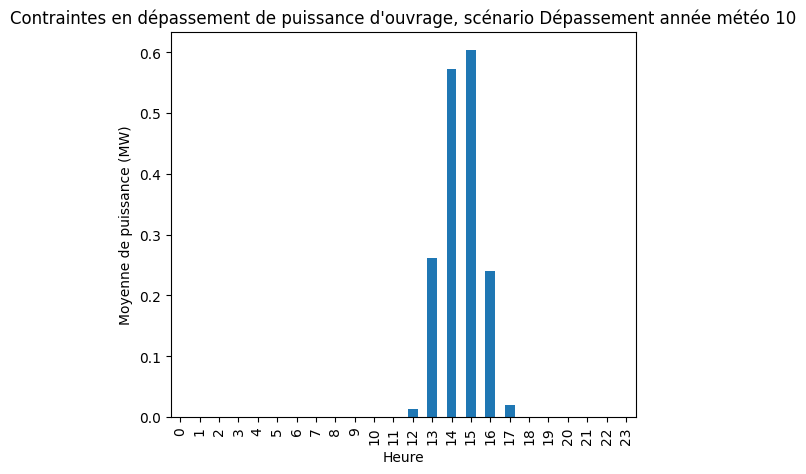

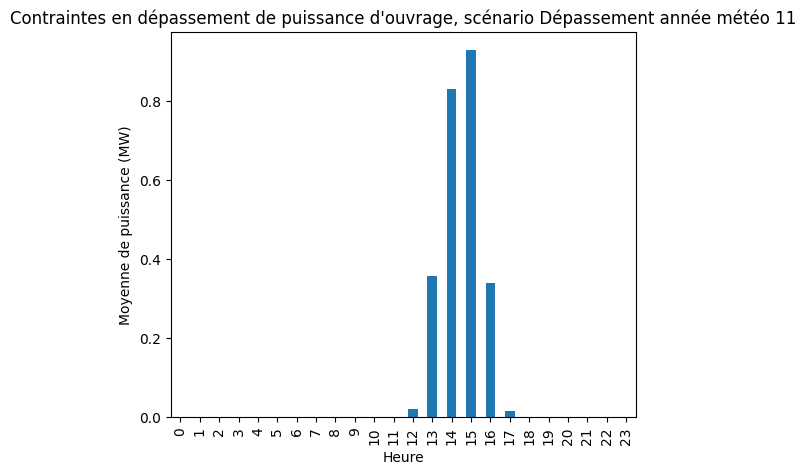

In [291]:
print('Identifier les heures les plus contraintes, scénario par scénario :')

for i,a in enumerate(list_name_scnenario):
    df = df2[['heure',a]].groupby(['heure'])[a].mean()
    plt.figure(i)
    df.plot(kind='bar', title="Contraintes en dépassement de puissance d'ouvrage, scénario " + a, ylabel='Moyenne de puissance (MW)',
         xlabel='Heure', figsize=(6, 5))

<Axes: title={'center': "Contraintes en dépassement de puissance d'ouvrage, moyenne sur tous les scénarios"}, xlabel='Heure', ylabel='Moyenne de puissance (MW)'>

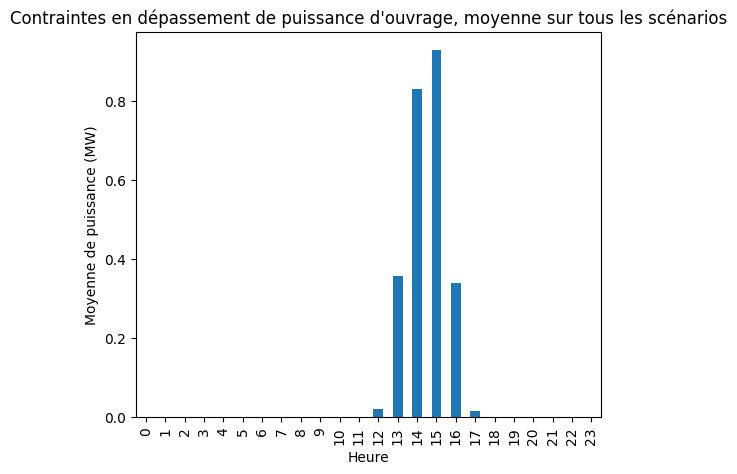

In [292]:
# Moyenne sur tous les scénarios
h_scen = ['heure']+list_name_scnenario
df3 = df2[h_scen].groupby('heure').mean().mean(axis=1)

df.plot(kind='bar', title="Contraintes en dépassement de puissance d'ouvrage, moyenne sur tous les scénarios", ylabel='Moyenne de puissance (MW)', xlabel='Heure', figsize=(6, 5))

## Commentaires

1. CDPD2025 vs CDPD2030 :